# Infraestrutura

> Versão do Python e ambiente virtual

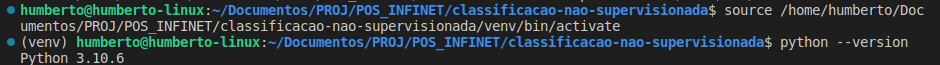

# Libs

## Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Cluster

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

## Data manipulation

In [ ]:
import pandas as pd
import os

## Data Request

In [ ]:
def handle_dataframe():
    files = [f'data/archive/{csv}' for csv in os.listdir('data/archive') if '.csv' in csv]
    datasets = []
    for file in files:
        df = pd.read_csv(file, index_col=None, header=0)
        df['name'] = file.replace('data/archive/', '').replace('.csv', '')
        datasets.append(df)

    return pd.concat(datasets, axis=0, ignore_index=True)

df_s_e_p_500 = handle_dataframe()

# Escolha da base

1- Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
> Preços das ações do S&P 500

2- Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.
> Trabalhar com dados na área de finanças, buscando aumentar meus conhecimentos no ramo, tendo em vista meu campo de atuação em uma empresa do setor financeiro

3- Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. 

In [26]:
df_s_e_p_500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4.120670e+06,4.120670e+06,4.120670e+06,4.120670e+06,4.120670e+06,4.120670e+06
mean,4.907833e+01,4.999149e+01,4.880729e+01,4.941343e+01,4.204558e+01,5.240059e+06
std,1.180251e+02,1.193862e+02,1.163993e+02,1.179184e+02,1.142766e+02,2.882202e+07
min,0.000000e+00,1.302100e-02,1.237000e-02,1.302100e-02,1.858731e-03,0.000000e+00
25%,7.863405e+00,8.474527e+00,8.243189e+00,8.360000e+00,4.120000e+00,4.428000e+05
50%,2.434667e+01,2.475000e+01,2.412500e+01,2.445500e+01,1.637348e+01,1.338500e+06
75%,5.343000e+01,5.403000e+01,5.281250e+01,5.345000e+01,4.289384e+01,3.563600e+06
max,5.977610e+03,5.982450e+03,5.884060e+03,5.959330e+03,5.959330e+03,7.421641e+09


<AxesSubplot: >

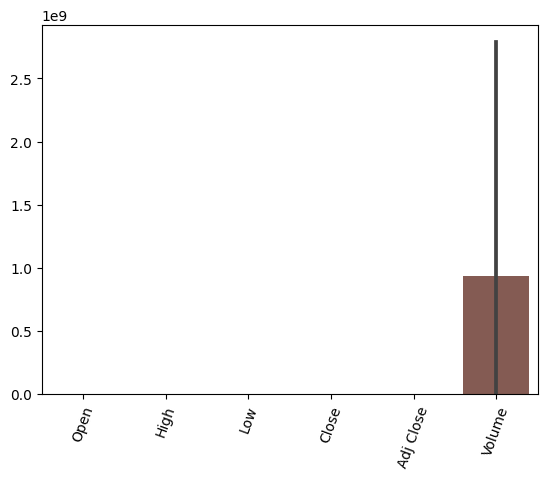

In [27]:
plt.xticks(rotation=70)
sns.barplot(data=df_s_e_p_500)

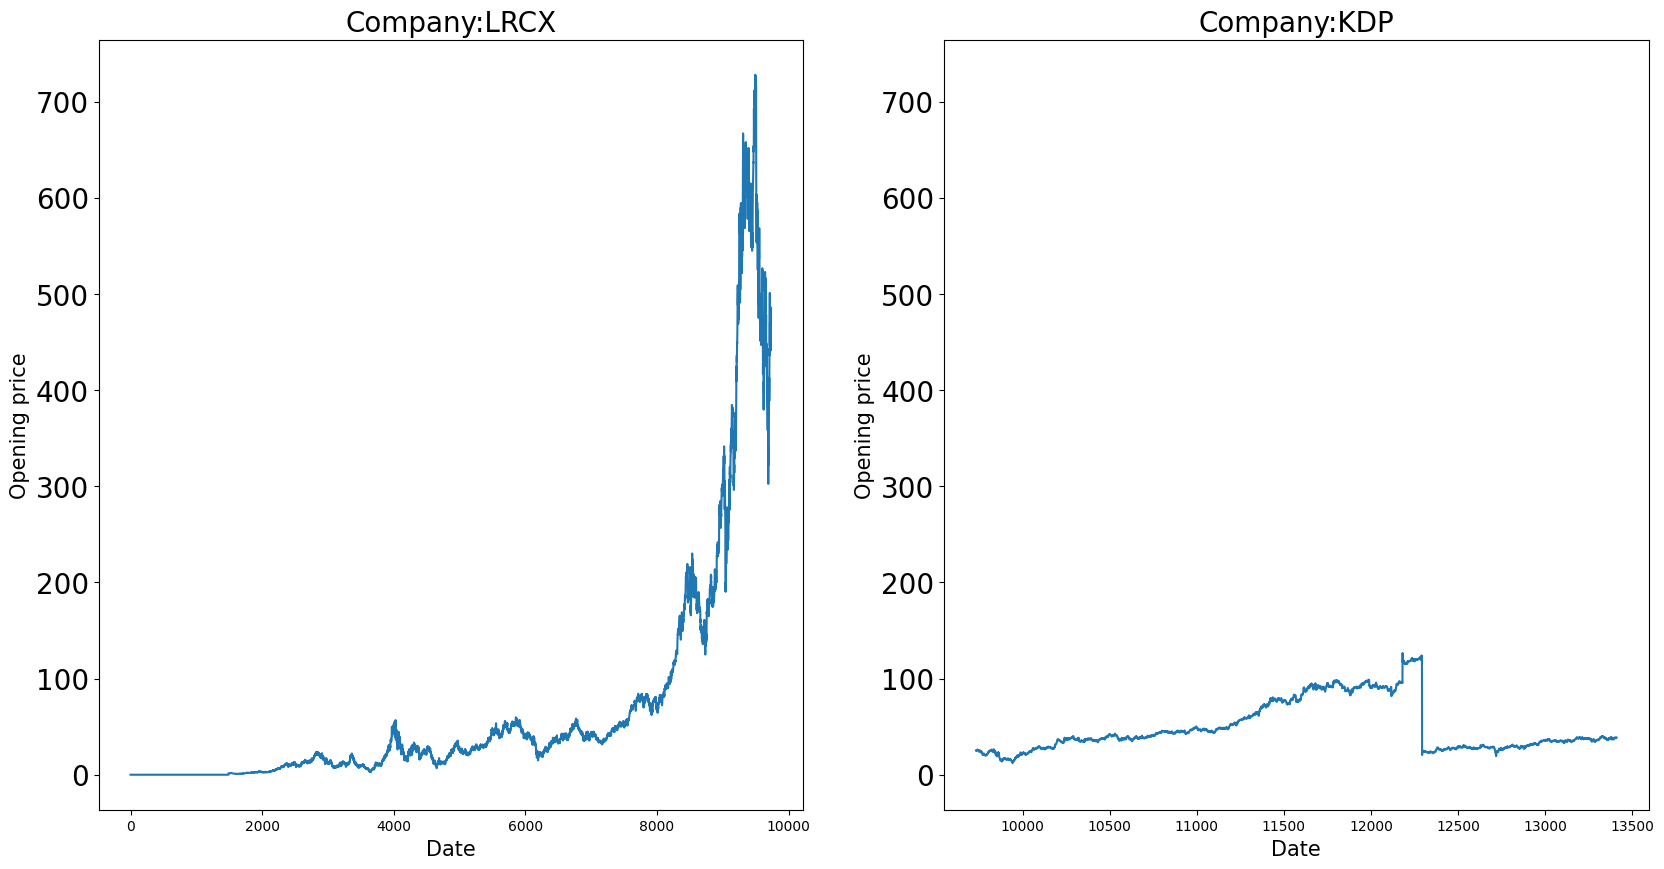

In [28]:
plt.figure(figsize = (20,10)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:LRCX',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df_s_e_p_500.query('name == "LRCX"')['Open'])
plt.subplot(1,2,2, sharey = ax1) 
plt.title('Company:KDP',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df_s_e_p_500.query('name == "KDP"')['Open'])

4- Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
> As variáveis, bem como o preço entre as ações possuem escalas diferentes, necessitando que seje feita a normalização dos dados, permitindo a correta clusterização.

5- Realize o pré-processamento adequado dos dados. Descreva os passos necessários.
- Obtenção dos dados, utilizando a leitura dos arquivos csv, onde cada arquivo representa a série histórica de uma única ação;
- Junção dos csv, criando a coluna name, para diferenciar os dados de cada ação;
- Verificação da distribuição das variáveis, por meio de gráfico e da função describe, presente no pandas;
- Necessidade de normalização. Foi utilizada a função Normalizer da biblioteca Sklearn.
- Na normalização é necessário retirar as colunas "Date" e "name", que representam informações descritivas dos dados.


In [6]:
mask = df_s_e_p_500.Date > '2022-06-01'
df_s_e_p_500 = df_s_e_p_500[mask]
df_s_e_p_500

,Date,Open,High,Low,Close,Adj Close,Volume,name
9598,2022-06-02,503.059998,523.789978,502.049988,523.299988,517.602722,1160000.0,LRCX
9599,2022-06-03,512.690002,521.270020,509.209991,513.979980,508.384155,1330400.0,LRCX
9600,2022-06-06,526.669983,532.890015,513.700012,516.260010,510.639465,785200.0,LRCX
9601,2022-06-07,509.420013,524.969971,508.350006,523.440002,517.741272,1150200.0,LRCX
9602,2022-06-08,521.869995,524.070007,507.950012,512.130005,506.554352,900900.0,LRCX
...,...,...,...,...,...,...,...,...
4120665,2022-12-07,94.010002,95.089996,93.750000,94.709999,94.709999,4378700.0,EMR
4120666,2022-12-08,95.190002,95.639999,94.580002,94.930000,94.930000,2718800.0,EMR
4120667,2022-12-09,95.209999,95.889999,94.050003,94.190002,94.190002,2579600.0,EMR
4120668,2022-12-12,94.589996,96.199997,94.360001,96.150002,96.150002,2869500.0,EMR


# Clusterização

## Pre-Processamento

In [12]:
normalizer = Normalizer()
data_normalizer = normalizer.fit_transform(df_s_e_p_500.drop(columns=['Date', 'name']))
df_normalizer = pd.DataFrame(data_normalizer, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
df_normalizer

,Open,High,Low,Close,Adj Close,Volume
0,0.000000,8.724481e-07,8.616771e-07,8.616771e-07,7.557619e-07,1.0
1,0.000000,2.192982e-05,2.138834e-05,2.138834e-05,1.875935e-05,1.0
2,0.000000,1.619105e-05,1.598866e-05,1.598866e-05,1.402338e-05,1.0
3,0.000000,2.996524e-06,2.959067e-06,2.959067e-06,2.595346e-06,1.0
4,0.000000,7.224507e-06,7.041610e-06,7.041610e-06,6.176074e-06,1.0
...,...,...,...,...,...,...
4120665,0.000021,2.171649e-05,2.141046e-05,2.162971e-05,2.162971e-05,1.0
4120666,0.000035,3.517728e-05,3.478741e-05,3.491614e-05,3.491614e-05,1.0
4120667,0.000037,3.717243e-05,3.645914e-05,3.651341e-05,3.651341e-05,1.0
4120668,0.000033,3.352500e-05,3.288378e-05,3.350758e-05,3.350758e-05,1.0


# Medidas de similaridade

In [11]:
pd.DataFrame(norm_movements)

,0,1,2,3,4,5
0,0.000000,8.724481e-07,8.616771e-07,8.616771e-07,7.557619e-07,1.0
1,0.000000,2.192982e-05,2.138834e-05,2.138834e-05,1.875935e-05,1.0
2,0.000000,1.619105e-05,1.598866e-05,1.598866e-05,1.402338e-05,1.0
3,0.000000,2.996524e-06,2.959067e-06,2.959067e-06,2.595346e-06,1.0
4,0.000000,7.224507e-06,7.041610e-06,7.041610e-06,6.176074e-06,1.0
...,...,...,...,...,...,...
4120665,0.000021,2.171649e-05,2.141046e-05,2.162971e-05,2.162971e-05,1.0
4120666,0.000035,3.517728e-05,3.478741e-05,3.491614e-05,3.491614e-05,1.0
4120667,0.000037,3.717243e-05,3.645914e-05,3.651341e-05,3.651341e-05,1.0
4120668,0.000033,3.352500e-05,3.288378e-05,3.350758e-05,3.350758e-05,1.0


# Testes

In [7]:
df_min_max_scaled = df_s_e_p_500.copy()
for column in df_min_max_scaled.columns:
    if column not in ('name', 'Date'):
        df_min_max_scaled[column] = (df_min_max_scaled[column] -
        df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() -
        df_min_max_scaled[column].min())
        df_min_max_scaled

In [8]:
from sklearn.datasets import make_blobs

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
"""X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility
"""

# X = df_min_max_scaled[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].reset_index(drop=True).sample(10000).copy()
X = reduced_data
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        # X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9285182655604763
For n_clusters = 3 The average silhouette_score is : 0.620777746760166
For n_clusters = 4 The average silhouette_score is : 0.6113400897709966
For n_clusters = 5 The average silhouette_score is : 0.5256570838347181
For n_clusters = 6 The average silhouette_score is : 0.5696288206295844


In [9]:
reduced_data = PCA(n_components=2).fit_transform(df_min_max_scaled.drop(columns=['Date', 'name']))

In [42]:
len(reduced_data)

67500

# Medidas de similaridade


1 - Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

- Normalização dos dados
- Passo 2
- Passo 3

2 - Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

- Kmeans, justificativa

3 - Indique um caso de uso para essa solução projetada.

- Preço de ações

4 - Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

- Correlação de Pearson.
Passos:
- Passo 1
- Passo 2
- Passo 3